In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataframe = pd.read_csv("vaccination_rate_analysis.csv", index_col="STATE")
print(dataframe.columns)

Index(['Fully Vaccinated (% State Population)',
       '2020 Election Trump Voters (%)', '2020 Election Biden Voters (%)',
       'Residents Per Square Mile', 'GDP Per Capita',
       'Advanced Degrees (% State Population)',
       'Primary Care Phycisians (Per 100,000)'],
      dtype='object')


In [3]:
def get_spearman(vaccination_rates, variable):
    spearman = stats.spearmanr(vaccination_rates, variable)
    spearman = round(spearman[0], 4)
    print(spearman)
    return spearman

vaccination_rates = dataframe['Fully Vaccinated (% State Population)']
variables = [dataframe['2020 Election Trump Voters (%)'], 
             dataframe['2020 Election Biden Voters (%)'],
             dataframe['Residents Per Square Mile'], 
             dataframe['GDP Per Capita'],
             dataframe['Advanced Degrees (% State Population)'],
             dataframe['Primary Care Phycisians (Per 100,000)']]

In [4]:
trump_correlation = get_spearman(vaccination_rates, variables[0])

-0.8498


In [5]:
biden_correlation = get_spearman(vaccination_rates, variables[1])

0.8408


In [6]:
population_dens_correlation = get_spearman(vaccination_rates, variables[2])

0.3986


In [7]:
gdp_correlation = get_spearman(vaccination_rates, variables[3])

0.5449


In [8]:
education_correlation = get_spearman(vaccination_rates, variables[4])

0.7989


In [9]:
pcp_correlation = get_spearman(vaccination_rates, variables[5])

0.8175


<AxesSubplot:title={'center':'Access to Primary Care Phycisians\n (Spearman Correlation: 0.8175)'}, xlabel='Fully Vaccinated (% State Population)', ylabel='Primary Care Phycisians (Per 100,000)'>

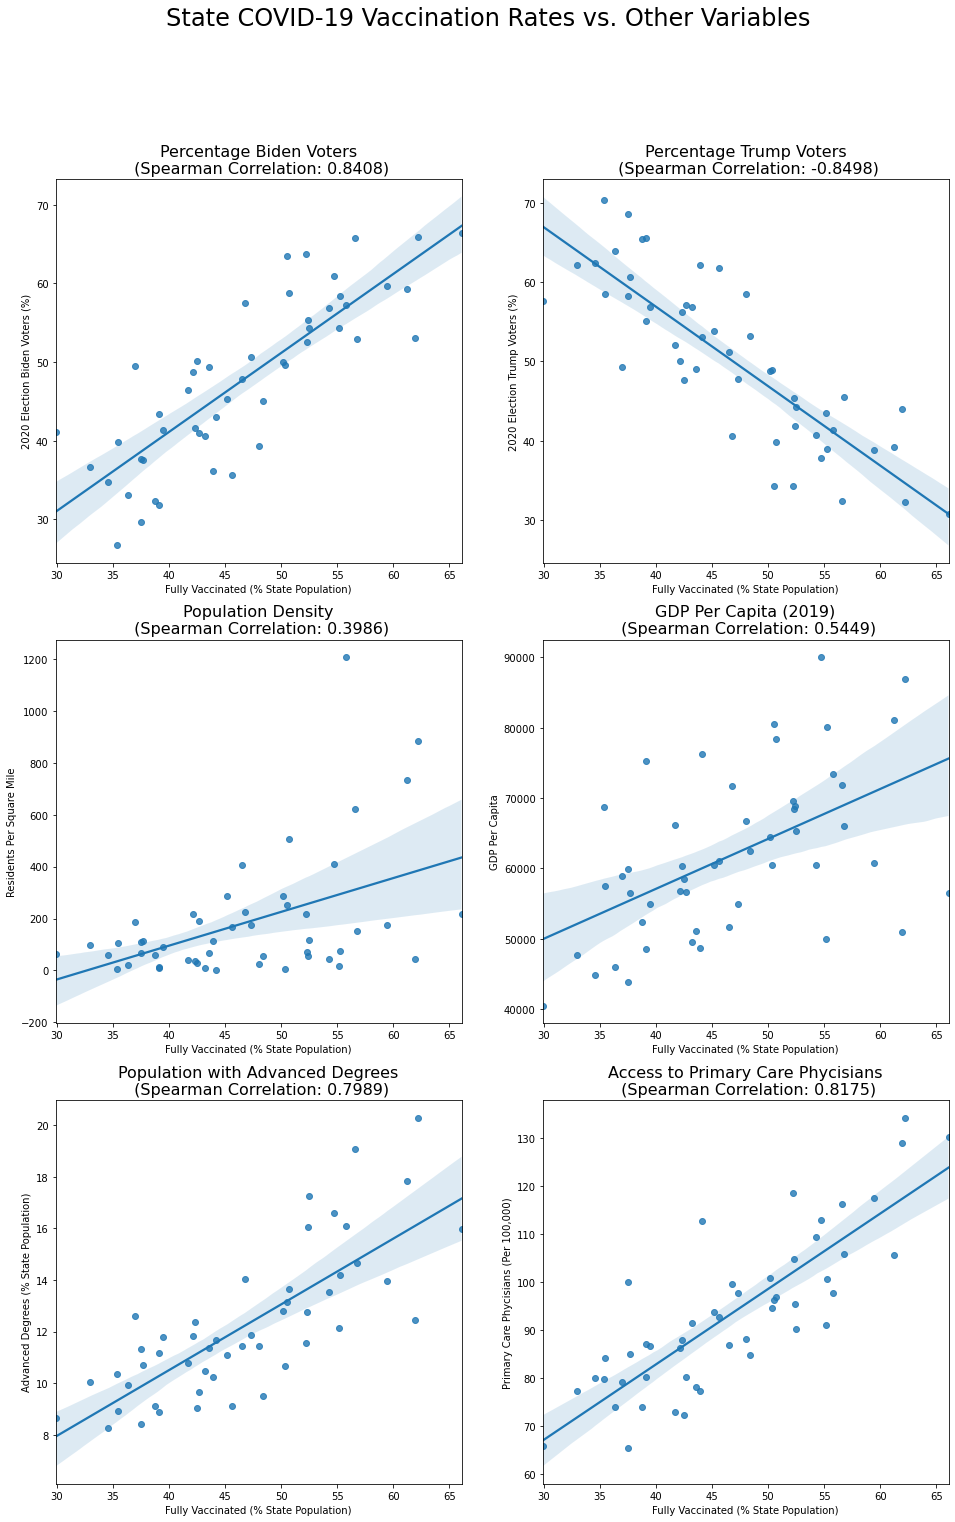

In [15]:
f, axes = plt.subplots(3, 2, figsize=(16,24))
f.suptitle("State COVID-19 Vaccination Rates vs. Other Variables", size=24)

axes[0][0].set_title("Percentage Biden Voters\n (Spearman Correlation: "+str(biden_correlation)+")", size = 16)
axes[0][1].set_title("Percentage Trump Voters\n (Spearman Correlation: "+str(trump_correlation)+")", size = 16)

axes[1][0].set_title("Population Density\n (Spearman Correlation: "+str(population_dens_correlation)+")", size = 16)
axes[1][1].set_title("GDP Per Capita (2019)\n (Spearman Correlation: "+str(gdp_correlation)+")", size = 16)

axes[2][0].set_title("Population with Advanced Degrees\n (Spearman Correlation: "+str(education_correlation)+")", size = 16)
axes[2][1].set_title("Access to Primary Care Phycisians\n (Spearman Correlation: "+str(pcp_correlation)+")", size = 16)

sns.regplot(y='2020 Election Biden Voters (%)', x= 'Fully Vaccinated (% State Population)', data=dataframe, ax=axes[0][0])
sns.regplot(y='2020 Election Trump Voters (%)', x= 'Fully Vaccinated (% State Population)', data=dataframe, ax=axes[0][1])

sns.regplot(y='Residents Per Square Mile', x= 'Fully Vaccinated (% State Population)', data=dataframe, ax=axes[1][0])
sns.regplot(y='GDP Per Capita', x= 'Fully Vaccinated (% State Population)', data=dataframe, ax=axes[1][1])

sns.regplot(y='Advanced Degrees (% State Population)', x= 'Fully Vaccinated (% State Population)', data=dataframe, ax=axes[2][0])
sns.regplot(y='Primary Care Phycisians (Per 100,000)', x= 'Fully Vaccinated (% State Population)', data=dataframe, ax=axes[2][1])
